In [1]:
import pandas as pd
import numpy as np
import requests

https://towardsdatascience.com/how-to-use-multiindex-in-pandas-to-level-up-your-analysis-aeac7f451fce

https://github.com/metmuseum/openaccess/raw/master/MetObjects.csv  
https://www.scq.ubc.ca/so-much-candy-data-seriously/

## 2017 Data

In [2]:
candy17url = 'https://www.scq.ubc.ca/wp-content/uploads/2017/10/candyhierarchy2017.csv'

In [3]:
# Specified latin encoding to deal with error
df = pd.read_csv(candy17url, encoding='latin-1')

In [4]:
df.shape

(2460, 120)

In [5]:
df.head()

,Internal ID,Q1: GOING OUT?,Q2: GENDER,Q3: AGE,Q4: COUNTRY,"Q5: STATE, PROVINCE, COUNTY, ETC",Q6 | 100 Grand Bar,Q6 | Anonymous brown globs that come in black and orange wrappers\t(a.k.a. Mary Janes),Q6 | Any full-sized candy bar,Q6 | Black Jacks,...,Q8: DESPAIR OTHER,Q9: OTHER COMMENTS,Q10: DRESS,Unnamed: 113,Q11: DAY,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo],"Click Coordinates (x, y)"
0,90258773,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,90272821,No,Male,44,USA,NM,MEH,DESPAIR,JOY,MEH,...,NaN,Bottom line is Twix is really the only candy w...,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(84, 25)"
2,90272829,NaN,Male,49,USA,Virginia,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,90272840,No,Male,40,us,or,MEH,DESPAIR,JOY,MEH,...,NaN,Raisins can go to hell,White and gold,NaN,Sunday,NaN,1.0,NaN,NaN,"(75, 23)"
4,90272841,No,Male,23,usa,exton pa,JOY,DESPAIR,JOY,DESPAIR,...,NaN,NaN,White and gold,NaN,Friday,NaN,1.0,NaN,NaN,"(70, 10)"


In [6]:
df.describe()

,Internal ID,Q12: MEDIA [Daily Dish],Q12: MEDIA [Science],Q12: MEDIA [ESPN],Q12: MEDIA [Yahoo]
count,2.460000e+03,85.0,1362.0,99.0,67.0
mean,9.028016e+07,1.0,1.0,1.0,1.0
std,7.435532e+03,0.0,0.0,0.0,0.0
min,9.025877e+07,1.0,1.0,1.0,1.0
25%,9.027520e+07,1.0,1.0,1.0,1.0
50%,9.027780e+07,1.0,1.0,1.0,1.0
75%,9.028242e+07,1.0,1.0,1.0,1.0
max,9.031480e+07,1.0,1.0,1.0,1.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2460 entries, 0 to 2459
Columns: 120 entries, Internal ID to Click Coordinates (x, y)
dtypes: float64(4), int64(1), object(115)
memory usage: 2.3+ MB


Check for duplicates:

In [8]:
# print("Duplicates in:")
# for name in df.columns:
#     print("{:.<60}".format(name), any(df[name].duplicated()))

All columns, except ID, contain Duplicates.

In [9]:
# print("NaN's in:")
# for name in df.columns:
#     print("{:.<60} {}".format(name, df[name].isna().any()))

All columns, except ID, contain null values.

In [10]:
df.columns[1]

'Q1: GOING OUT?'

In [11]:
df[df.columns[1]]

0       NaN
1        No
2       NaN
3        No
4        No
       ... 
2455     No
2456     No
2457     No
2458     No
2459     No
Name: Q1: GOING OUT?, Length: 2460, dtype: object

## 2016 Data Set

In [12]:
candy16url = "https://www.scq.ubc.ca/wp-content/uploads/2016/10/BOING-BOING-CANDY-HIERARCHY-2016-SURVEY-Responses.xlsx"

In [13]:
df = pd.read_excel(candy16url)

In [14]:
df.head()

,Timestamp,Are you going actually going trick or treating yourself?,Your gender:,How old are you?,Which country do you live in?,"Which state, province, county do you live in?",[100 Grand Bar],[Anonymous brown globs that come in black and orange wrappers],[Any full-sized candy bar],[Black Jacks],...,Please estimate the degree(s) of separation you have from the following celebrities [JK Rowling],Please estimate the degree(s) of separation you have from the following celebrities [JJ Abrams],Please estimate the degree(s) of separation you have from the following celebrities [Beyoncé],Please estimate the degree(s) of separation you have from the following celebrities [Bieber],Please estimate the degree(s) of separation you have from the following celebrities [Kevin Bacon],Please estimate the degree(s) of separation you have from the following celebrities [Francis Bacon (1561 - 1626)],"Which day do you prefer, Friday or Sunday?","Do you eat apples the correct way, East to West (side to side) or do you eat them like a freak of nature, South to North (bottom to top)?","When you see the above image of the 4 different websites, which one would you most likely check out (please be honest).",[York Peppermint Patties] Ignore
0,2016-10-24 05:09:23.033,No,Male,22,Canada,Ontario,JOY,DESPAIR,JOY,MEH,...,3 or higher,2,3 or higher,3 or higher,3 or higher,3 or higher,Friday,South to North,Science: Latest News and Headlines,NaN
1,2016-10-24 05:09:54.798,No,Male,45,usa,il,MEH,MEH,JOY,JOY,...,3 or higher,3 or higher,3 or higher,3 or higher,3 or higher,3 or higher,Friday,East to West,Science: Latest News and Headlines,NaN
2,2016-10-24 05:13:06.734,No,Female,48,US,Colorado,JOY,DESPAIR,JOY,MEH,...,3 or higher,3 or higher,3 or higher,3 or higher,3 or higher,3 or higher,Sunday,East to West,Science: Latest News and Headlines,NaN
3,2016-10-24 05:14:17.192,No,Male,57,usa,il,JOY,MEH,JOY,MEH,...,3 or higher,3 or higher,3 or higher,3 or higher,3 or higher,3 or higher,Sunday,South to North,Science: Latest News and Headlines,NaN
4,2016-10-24 05:14:24.625,Yes,Male,42,USA,South Dakota,MEH,DESPAIR,JOY,DESPAIR,...,3 or higher,3 or higher,3 or higher,3 or higher,3 or higher,3 or higher,Friday,East to West,ESPN,NaN


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Columns: 123 entries, Timestamp to  [York Peppermint Patties] Ignore
dtypes: datetime64[ns](1), float64(1), object(121)
memory usage: 1.2+ MB


In [16]:
# # Check if any columns are all NaNs:
# for header in df.columns:
#     print("{:.<60}".format(header), df[header].isnull().all())

In [17]:
df[df.columns[-1]].isnull().all()

True

In [18]:
for header in df.columns:
    if df[header].isnull().all() == True:
        df.drop(header, axis=1, inplace=True)
    else:
        continue

In [19]:
len(df.columns)

122

In [20]:
df.columns[-1]

'When you see the above image of the 4 different websites, which one would you most likely check out (please be honest).'

In [21]:
# print("Duplicates in:")
# for name in df.columns:
#     print("{:.<60}".format(name), any(df[name].duplicated()))

No duplicates in 'Timestamp', all other columns contain duplicates

In [22]:
# print("NaN's in:")
# for name in df.columns:
#     print("{:.<60} {}".format(name, df[name].isna().any()))

No NaNs in 'Timestamp' or 'Are you going actually going trick or treating yourself?' columns. All others contain at least 1 NaN.

In [23]:
for item in df.columns:
    print(item)

Timestamp
Are you going actually going trick or treating yourself?
Your gender:
How old are you?
Which country do you live in?
Which state, province, county do you live in?
 [100 Grand Bar]
 [Anonymous brown globs that come in black and orange wrappers]
 [Any full-sized candy bar]
 [Black Jacks]
 [Bonkers (the candy)]
 [Bonkers (the board game)]
 [Bottle Caps]
 [Box'o'Raisins]
 [Broken glow stick]
 [Butterfinger]
 [Cadbury Creme Eggs]
 [Candy Corn]
 [Candy that is clearly just the stuff given out for free at restaurants]
 [Caramellos]
 [Cash, or other forms of legal tender]
 [Chardonnay]
 [Chick-o-Sticks (we don’t know what that is)]
 [Chiclets]
 [Coffee Crisp]
 [Creepy Religious comics/Chick Tracts]
 [Dental paraphenalia]
 [Dots]
 [Dove Bars]
 [Fuzzy Peaches]
 [Generic Brand Acetaminophen]
 [Glow sticks]
 [Goo Goo Clusters]
 [Good N' Plenty]
 [Gum from baseball cards]
 [Gummy Bears straight up]
 [Hard Candy]
 [Healthy Fruit]
 [Heath Bar]
 [Hershey's Dark Chocolate]
 [Hershey’s Milk Ch

### Replace NaNs in candy columns with 'UNKNOWN', because survey said to "leave blank if you have no idea what the item is":

In [24]:
startCol = df.columns[6]
endCol = df.columns[105]

In [25]:
df.loc[:, startCol:endCol].tail()

,[100 Grand Bar],[Anonymous brown globs that come in black and orange wrappers],[Any full-sized candy bar],[Black Jacks],[Bonkers (the candy)],[Bonkers (the board game)],[Bottle Caps],[Box'o'Raisins],[Broken glow stick],[Butterfinger],...,[Three Musketeers],[Tolberone something or other],[Trail Mix],[Twix],"[Vials of pure high fructose corn syrup, for main-lining into your vein]",[Vicodin],[Whatchamacallit Bars],[White Bread],[Whole Wheat anything],[York Peppermint Patties]
1254,JOY,DESPAIR,JOY,MEH,MEH,NaN,NaN,DESPAIR,NaN,JOY,...,MEH,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,MEH
1255,JOY,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,...,JOY,JOY,MEH,JOY,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH
1256,JOY,MEH,JOY,NaN,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,JOY,...,MEH,JOY,MEH,JOY,DESPAIR,DESPAIR,JOY,DESPAIR,DESPAIR,MEH
1257,NaN,DESPAIR,JOY,DESPAIR,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,JOY,...,MEH,JOY,DESPAIR,JOY,MEH,JOY,JOY,MEH,MEH,DESPAIR
1258,JOY,MEH,JOY,JOY,MEH,JOY,JOY,MEH,MEH,JOY,...,JOY,JOY,MEH,JOY,MEH,MEH,JOY,MEH,MEH,JOY


In [26]:
df.loc[:, startCol:endCol] = df.loc[:, startCol:endCol].fillna('UNKNOWN')

In [27]:
df.tail()

,Timestamp,Are you going actually going trick or treating yourself?,Your gender:,How old are you?,Which country do you live in?,"Which state, province, county do you live in?",[100 Grand Bar],[Anonymous brown globs that come in black and orange wrappers],[Any full-sized candy bar],[Black Jacks],...,What is your favourite font?,Please estimate the degree(s) of separation you have from the following celebrities [JK Rowling],Please estimate the degree(s) of separation you have from the following celebrities [JJ Abrams],Please estimate the degree(s) of separation you have from the following celebrities [Beyoncé],Please estimate the degree(s) of separation you have from the following celebrities [Bieber],Please estimate the degree(s) of separation you have from the following celebrities [Kevin Bacon],Please estimate the degree(s) of separation you have from the following celebrities [Francis Bacon (1561 - 1626)],"Which day do you prefer, Friday or Sunday?","Do you eat apples the correct way, East to West (side to side) or do you eat them like a freak of nature, South to North (bottom to top)?","When you see the above image of the 4 different websites, which one would you most likely check out (please be honest)."
1254,2016-10-29 16:53:52.516,No,Female,52,USA,TX,JOY,DESPAIR,JOY,MEH,...,Candara,3 or higher,3 or higher,3 or higher,3 or higher,2,3 or higher,Friday,East to West,Science: Latest News and Headlines
1255,2016-10-30 06:53:54.735,No,Male,33,united states,minnesota,JOY,DESPAIR,JOY,DESPAIR,...,Trebuchet,"Actually, that's me.",3 or higher,3 or higher,3 or higher,3 or higher,"Actually, that's me.",Friday,Sinusoidally around the equator,Science: Latest News and Headlines
1256,2016-10-30 11:06:10.827,No,Male,NaN,NaN,NaN,JOY,MEH,JOY,UNKNOWN,...,Comic Sans,NaN,NaN,NaN,NaN,NaN,NaN,Sunday,nne to east to nnw to s to n,Science: Latest News and Headlines
1257,2016-10-30 16:07:26.539,No,Male,48,canada,BC,UNKNOWN,DESPAIR,JOY,DESPAIR,...,NaN,1,2,3 or higher,3 or higher,2,3 or higher,Sunday,East to West,Science: Latest News and Headlines
1258,2016-10-30 17:06:45.660,Yes,Female,44,Us,Nh,JOY,MEH,JOY,JOY,...,NaN,3 or higher,3 or higher,3 or higher,3 or higher,3 or higher,3 or higher,Sunday,East to West,Daily Dish


In [28]:
df.index.names

FrozenList([None])

In [29]:
df.loc[:, df.columns[106]:].tail()

,Please list any items not included above that give you JOY.,Please list any items not included above that give you DESPAIR.,"Please leave any witty, snarky or thoughtful remarks or comments regarding your choices.",Guess the number of mints in my hand.,Betty or Veronica?,"""That dress* that went viral a few years back - when I first saw it, it was ________""",What is your favourite font?,Please estimate the degree(s) of separation you have from the following celebrities [JK Rowling],Please estimate the degree(s) of separation you have from the following celebrities [JJ Abrams],Please estimate the degree(s) of separation you have from the following celebrities [Beyoncé],Please estimate the degree(s) of separation you have from the following celebrities [Bieber],Please estimate the degree(s) of separation you have from the following celebrities [Kevin Bacon],Please estimate the degree(s) of separation you have from the following celebrities [Francis Bacon (1561 - 1626)],"Which day do you prefer, Friday or Sunday?","Do you eat apples the correct way, East to West (side to side) or do you eat them like a freak of nature, South to North (bottom to top)?","When you see the above image of the 4 different websites, which one would you most likely check out (please be honest)."
1254,"Red hots, mounds, almond joy",NaN,Are you guys kidding me?,14,Betty,White and gold,Candara,3 or higher,3 or higher,3 or higher,3 or higher,2,3 or higher,Friday,East to West,Science: Latest News and Headlines
1255,"Bandwidth, Take 5 (bar), Take 5 (jazz), anythi...","coconut, cream fillings, marshmallow, creepy d...",NaN,"seventeen and a half (that's gross, I don't wa...",???,Blue and black,Trebuchet,"Actually, that's me.",3 or higher,3 or higher,3 or higher,3 or higher,"Actually, that's me.",Friday,Sinusoidally around the equator,Science: Latest News and Headlines
1256,sky bar,dumdums,NaN,all of them have melted into a single mint by now,Veronica,Blue and black,Comic Sans,NaN,NaN,NaN,NaN,NaN,NaN,Sunday,nne to east to nnw to s to n,Science: Latest News and Headlines
1257,"weed, mini packs of mini cookies (oreos, etc)",NaN,NaN,NaN,Betty,White and gold,NaN,1,2,3 or higher,3 or higher,2,3 or higher,Sunday,East to West,Science: Latest News and Headlines
1258,NaN,NaN,NaN,6,Betty,White and gold,NaN,3 or higher,3 or higher,3 or higher,3 or higher,3 or higher,3 or higher,Sunday,East to West,Daily Dish


In [30]:
df.columns[121]

'When you see the above image of the 4 different websites, which one would you most likely check out (please be honest).'

In [31]:
df.index

RangeIndex(start=0, stop=1259, step=1)

In [32]:
df.columns[106]

'Please list any items not included above that give you JOY.'

In [33]:
dfLite = df.loc[:, :df.columns[105]]

In [34]:
dfLite.head()

,Timestamp,Are you going actually going trick or treating yourself?,Your gender:,How old are you?,Which country do you live in?,"Which state, province, county do you live in?",[100 Grand Bar],[Anonymous brown globs that come in black and orange wrappers],[Any full-sized candy bar],[Black Jacks],...,[Three Musketeers],[Tolberone something or other],[Trail Mix],[Twix],"[Vials of pure high fructose corn syrup, for main-lining into your vein]",[Vicodin],[Whatchamacallit Bars],[White Bread],[Whole Wheat anything],[York Peppermint Patties]
0,2016-10-24 05:09:23.033,No,Male,22,Canada,Ontario,JOY,DESPAIR,JOY,MEH,...,JOY,JOY,DESPAIR,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,JOY
1,2016-10-24 05:09:54.798,No,Male,45,usa,il,MEH,MEH,JOY,JOY,...,JOY,JOY,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,JOY
2,2016-10-24 05:13:06.734,No,Female,48,US,Colorado,JOY,DESPAIR,JOY,MEH,...,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,JOY
3,2016-10-24 05:14:17.192,No,Male,57,usa,il,JOY,MEH,JOY,MEH,...,JOY,JOY,JOY,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,JOY
4,2016-10-24 05:14:24.625,Yes,Male,42,USA,South Dakota,MEH,DESPAIR,JOY,DESPAIR,...,JOY,JOY,MEH,JOY,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH


In [35]:
countries = list(df['Which country do you live in?'].unique())

In [36]:
countries

['Canada',
 'usa',
 'US',
 'USA',
 'UK',
 'United States of America',
 'uSA',
 'Japan',
 'united states',
 'USA ',
 'canada',
 'United States',
 'us',
 'france',
 'USSA',
 'United States of America ',
 'U.S.A.',
 'A tropical island south of the equator',
 'england',
 'uk',
 'Switzerland',
 'Murica',
 'United Kingdom',
 'Neverland',
 'USA!',
 'this one',
 "USA (I think but it's an election year so who can really tell)",
 'Korea',
 51,
 'Usa',
 nan,
 'U.S.',
 'Us',
 'America ',
 'Units States',
 'belgium',
 'croatia',
 'United states',
 'Portugal',
 'England',
 'USA USA USA',
 'the best one - usa',
 'USA! USA! USA!',
 47,
 'united states ',
 'Cascadia',
 'españa',
 'u.s.',
 "there isn't one for old men",
 'United States ',
 'Panama',
 'one of the best ones',
 'The Yoo Ess of Aaayyyyyy',
 'United Kindom',
 'France',
 'America',
 'Australia',
 'hungary',
 'united states of america',
 'UK ',
 'Austria',
 'Somewhere',
 'New Zealand',
 54,
 'Germany',
 'Mexico',
 44,
 'Brasil',
 "god's countr

In [37]:
# pip install country_converter --upgrade

In [38]:
# # lowercase all countries
# countriesLower = []
# for c in countries:
#     countriesLower += [str(c).lower().strip()]

In [39]:
# countriesLower

In [40]:
# import country_converter as coco
# # some_names = ['United Rep. of Tanzania', 'DE', 'Cape Verde', '788', 'Burma', 'COG',
# #               'Iran (Islamic Republic of)', 'Korea, Republic of',
# #               "Dem. People's Rep. of Korea"]
# standard_names = coco.convert(names=countriesLower, to='name_short')
# print(standard_names)

In [41]:
# pip install pycountry

In [42]:
import pycountry

In [43]:
# pycountry.countries.search_fuzzy(countries)

In [44]:
testDF = df[['Timestamp', 'Which country do you live in?']]

In [45]:
testDF.head()

,Timestamp,Which country do you live in?
0,2016-10-24 05:09:23.033,Canada
1,2016-10-24 05:09:54.798,usa
2,2016-10-24 05:13:06.734,US
3,2016-10-24 05:14:17.192,usa
4,2016-10-24 05:14:24.625,USA


In [46]:
testDF.columns = ['Timestamp', 'Country']

In [47]:
testDF.columns

Index(['Timestamp', 'Country'], dtype='object')

In [48]:
fuzzyUSA = pycountry.countries.search_fuzzy('usa')

In [49]:
fuzzyUSA[0]

Country(alpha_2='US', alpha_3='USA', name='United States', numeric='840', official_name='United States of America')

In [50]:
type(fuzzyUSA[0])

pycountry.db.Country

In [51]:
fuzzyUSA[0].name

'United States'

In [52]:
pycountry.countries.search_fuzzy('usa')[0].name

'United States'

In [53]:
testDF = df[['Timestamp', 'Which country do you live in?']].copy()
testDF.columns = ['Timestamp', 'Country']
testDF.head()

,Timestamp,Country
0,2016-10-24 05:09:23.033,Canada
1,2016-10-24 05:09:54.798,usa
2,2016-10-24 05:13:06.734,US
3,2016-10-24 05:14:17.192,usa
4,2016-10-24 05:14:24.625,USA


In [54]:
# testDF['Country'] = testDF['Country'].str.lower()

In [55]:
testDF['Country'] = testDF['Country'].str.lower().str.replace('[.,!]', '')

In [56]:
testDF.head()

,Timestamp,Country
0,2016-10-24 05:09:23.033,canada
1,2016-10-24 05:09:54.798,usa
2,2016-10-24 05:13:06.734,us
3,2016-10-24 05:14:17.192,usa
4,2016-10-24 05:14:24.625,usa


In [57]:
# testDF['Test'] = testDF['Country'].str.apply(lambda x: 'usa' if x.startswith('us') else x)

In [58]:
import numpy as np

In [59]:
# testDF.Country[testDF.Country.str.startswith('us')]

In [60]:
testDF['Test'] = np.where(testDF['Country'].str.startswith('us'), 'usa', testDF['Country'])
testDF['Test'] = np.where(testDF['Test'].str.endswith('usa'), 'usa', testDF['Test'])

In [61]:
testDF[testDF.Test.str.startswith('esp')]

,Timestamp,Country,Test
367,2016-10-24 09:31:09.132,españa,españa


In [62]:
replacements = {
    'uk': 'united kingdom',
    'units states': 'usa',
    'america': 'usa',
    'the yoo ess of aaayyyyyy': 'usa',
    'españa': 'spain',
    'murica': 'usa',
    'united kindom': 'united kingdom',
    'brasil': 'brazil',
    "god's country": 'usa',
    'united sates': 'usa',
    "sub-canadian north america 'merica": 'usa',
    'trumpistan': 'usa',
    'united stetes': 'usa'
}

In [63]:
testDF['Test'].replace(replacements, inplace=True)

In [64]:
# testDf['Country'].apply(lambda x: 'usa' if x.startswith('us') else x)

In [65]:
testDF.head(10)

,Timestamp,Country,Test
0,2016-10-24 05:09:23.033,canada,canada
1,2016-10-24 05:09:54.798,usa,usa
2,2016-10-24 05:13:06.734,us,usa
3,2016-10-24 05:14:17.192,usa,usa
4,2016-10-24 05:14:24.625,usa,usa
5,2016-10-24 05:16:43.126,usa,usa
6,2016-10-24 05:16:50.572,usa,usa
7,2016-10-24 05:16:55.324,canada,canada
8,2016-10-24 05:17:49.292,usa,usa
9,2016-10-24 05:18:51.021,uk,united kingdom


In [66]:
# testDF['Test'] = testDF['Country'].startswith('us').replace('usa')

In [67]:
# testDF['New'] = testDF['Country'].map(lambda x: re.sub(r'\W+', '', x))
# testDF['Country'] = testDF['Country'].str.replace('[.,!]', '')

Notes:  
UK should be United Kingdom, not ukraine  
Remove Punctuation  
USSA, probably USA  
anything that starts with US --> USA? Probably  
Units States  
America --> US, not American Samoa  
Not found: (maybe do a search, filtering by NOT FOUND)  
  The best one -- USA  
  USA USA USA  
  Espana  
  The Yoo Ess of Aaayyyyyy

In [68]:
# countryFix = {
#     'uk': 'united kingdom',
    
# }

In [69]:
# testDF.head(50)

In [70]:
testDF.Country = testDF.Country.str.lower()

In [71]:
testDF.Country = testDF.Country.str.strip()

In [72]:
def fuzzyCountry(countryName):
    try:
        return pycountry.countries.search_fuzzy(countryName)[0].name
    except:
        return ("NOT FOUND")

In [73]:
testDF['Country Guess'] = testDF.apply(lambda row: fuzzyCountry(row.Country), axis=1)

In [74]:
testDF['Country Guess'] = testDF.apply(lambda row: fuzzyCountry(row.Test), axis=1)

In [75]:
testDF[testDF['Country Guess'] == 'NOT FOUND']

,Timestamp,Country,Test,Country Guess
57,2016-10-24 05:54:40.128,a tropical island south of the equator,a tropical island south of the equator,NOT FOUND
89,2016-10-24 06:15:22.247,neverland,neverland,NOT FOUND
99,2016-10-24 06:21:18.515,this one,this one,NOT FOUND
310,2016-10-24 08:50:32.535,cascadia,cascadia,NOT FOUND
411,2016-10-24 10:21:01.946,there isn't one for old men,there isn't one for old men,NOT FOUND
444,2016-10-24 11:00:42.575,one of the best ones,one of the best ones,NOT FOUND
612,2016-10-24 14:48:10.100,somewhere,somewhere,NOT FOUND
725,2016-10-24 19:21:39.300,south korea,south korea,NOT FOUND
1071,2016-10-27 10:42:49.888,see above,see above,NOT FOUND
1124,2016-10-27 12:23:56.227,the republic of cascadia,the republic of cascadia,NOT FOUND


In [76]:
testDF[500:550]

,Timestamp,Country,Test,Country Guess
500,2016-10-24 12:03:16.062,usa,usa,United States
501,2016-10-24 12:04:23.018,usa,usa,United States
502,2016-10-24 12:08:21.353,usa,usa,United States
503,2016-10-24 12:11:18.214,us,usa,United States
504,2016-10-24 12:12:36.524,usa,usa,United States
505,2016-10-24 12:12:41.987,usa,usa,United States
506,2016-10-24 12:14:06.431,united states,united states,United States
507,2016-10-24 12:15:41.961,usa,usa,United States
508,2016-10-24 12:15:58.021,usa,usa,United States
509,2016-10-24 12:17:19.083,usa,usa,United States


In [77]:
df[df['Which country do you live in?'] == "god's country"]

,Timestamp,Are you going actually going trick or treating yourself?,Your gender:,How old are you?,Which country do you live in?,"Which state, province, county do you live in?",[100 Grand Bar],[Anonymous brown globs that come in black and orange wrappers],[Any full-sized candy bar],[Black Jacks],...,What is your favourite font?,Please estimate the degree(s) of separation you have from the following celebrities [JK Rowling],Please estimate the degree(s) of separation you have from the following celebrities [JJ Abrams],Please estimate the degree(s) of separation you have from the following celebrities [Beyoncé],Please estimate the degree(s) of separation you have from the following celebrities [Bieber],Please estimate the degree(s) of separation you have from the following celebrities [Kevin Bacon],Please estimate the degree(s) of separation you have from the following celebrities [Francis Bacon (1561 - 1626)],"Which day do you prefer, Friday or Sunday?","Do you eat apples the correct way, East to West (side to side) or do you eat them like a freak of nature, South to North (bottom to top)?","When you see the above image of the 4 different websites, which one would you most likely check out (please be honest)."
715,2016-10-24 18:57:28.334,No,Male,23.2,god's country,douglass commonwealth,JOY,MEH,JOY,UNKNOWN,...,tacoma,3 or higher,3 or higher,3 or higher,2,3 or higher,3 or higher,Sunday,start at the stem/ the big round top bits,YAHOO! Finance.


In [78]:
df.columns

Index(['Timestamp', 'Are you going actually going trick or treating yourself?',
       'Your gender:', 'How old are you?', 'Which country do you live in?',
       'Which state, province, county do you live in?', ' [100 Grand Bar]',
       ' [Anonymous brown globs that come in black and orange wrappers]',
       ' [Any full-sized candy bar]', ' [Black Jacks]',
       ...
       'What is your favourite font?',
       'Please estimate the degree(s) of separation you have from the following celebrities [JK Rowling]',
       'Please estimate the degree(s) of separation you have from the following celebrities [JJ Abrams]',
       'Please estimate the degree(s) of separation you have from the following celebrities [Beyoncé]',
       'Please estimate the degree(s) of separation you have from the following celebrities [Bieber]',
       'Please estimate the degree(s) of separation you have from the following celebrities [Kevin Bacon]',
       'Please estimate the degree(s) of separation you have

In [79]:
testDF.head()

,Timestamp,Country,Test,Country Guess
0,2016-10-24 05:09:23.033,canada,canada,Canada
1,2016-10-24 05:09:54.798,usa,usa,United States
2,2016-10-24 05:13:06.734,us,usa,United States
3,2016-10-24 05:14:17.192,usa,usa,United States
4,2016-10-24 05:14:24.625,usa,usa,United States


In [80]:
testDF[testDF['Country Guess'] == 'NOT FOUND']

,Timestamp,Country,Test,Country Guess
57,2016-10-24 05:54:40.128,a tropical island south of the equator,a tropical island south of the equator,NOT FOUND
89,2016-10-24 06:15:22.247,neverland,neverland,NOT FOUND
99,2016-10-24 06:21:18.515,this one,this one,NOT FOUND
310,2016-10-24 08:50:32.535,cascadia,cascadia,NOT FOUND
411,2016-10-24 10:21:01.946,there isn't one for old men,there isn't one for old men,NOT FOUND
444,2016-10-24 11:00:42.575,one of the best ones,one of the best ones,NOT FOUND
612,2016-10-24 14:48:10.100,somewhere,somewhere,NOT FOUND
725,2016-10-24 19:21:39.300,south korea,south korea,NOT FOUND
1071,2016-10-27 10:42:49.888,see above,see above,NOT FOUND
1124,2016-10-27 12:23:56.227,the republic of cascadia,the republic of cascadia,NOT FOUND


In [81]:
temp = testDF.copy()

In [82]:
temp.head()

,Timestamp,Country,Test,Country Guess
0,2016-10-24 05:09:23.033,canada,canada,Canada
1,2016-10-24 05:09:54.798,usa,usa,United States
2,2016-10-24 05:13:06.734,us,usa,United States
3,2016-10-24 05:14:17.192,usa,usa,United States
4,2016-10-24 05:14:24.625,usa,usa,United States


In [83]:
temp['Country Guess'].replace('NOT FOUND', np.nan, inplace=True)

In [84]:
temp[temp['Country Guess'] == 'NOT FOUND']

,Timestamp,Country,Test,Country Guess


In [85]:
temp[temp['Country Guess'].isnull()]

,Timestamp,Country,Test,Country Guess
57,2016-10-24 05:54:40.128,a tropical island south of the equator,a tropical island south of the equator,NaN
89,2016-10-24 06:15:22.247,neverland,neverland,NaN
99,2016-10-24 06:21:18.515,this one,this one,NaN
310,2016-10-24 08:50:32.535,cascadia,cascadia,NaN
411,2016-10-24 10:21:01.946,there isn't one for old men,there isn't one for old men,NaN
444,2016-10-24 11:00:42.575,one of the best ones,one of the best ones,NaN
612,2016-10-24 14:48:10.100,somewhere,somewhere,NaN
725,2016-10-24 19:21:39.300,south korea,south korea,NaN
1071,2016-10-27 10:42:49.888,see above,see above,NaN
1124,2016-10-27 12:23:56.227,the republic of cascadia,the republic of cascadia,NaN


In [86]:
temp.iloc[57]

Timestamp                    2016-10-24 05:54:40.128000
Country          a tropical island south of the equator
Test             a tropical island south of the equator
Country Guess                                       NaN
Name: 57, dtype: object

In [87]:
combined = temp['Country Guess'].combine_first(temp['Country'])

In [88]:
type(combined)

pandas.core.series.Series

In [89]:
len(combined)

1259

In [90]:
len(temp)

1259

In [91]:
temp['Combined'] = temp['Country Guess'].combine_first(temp['Country']).str.title()

In [92]:
temp.head()

,Timestamp,Country,Test,Country Guess,Combined
0,2016-10-24 05:09:23.033,canada,canada,Canada,Canada
1,2016-10-24 05:09:54.798,usa,usa,United States,United States
2,2016-10-24 05:13:06.734,us,usa,United States,United States
3,2016-10-24 05:14:17.192,usa,usa,United States,United States
4,2016-10-24 05:14:24.625,usa,usa,United States,United States


In [93]:
temp[temp['Country Guess'].isnull()]

,Timestamp,Country,Test,Country Guess,Combined
57,2016-10-24 05:54:40.128,a tropical island south of the equator,a tropical island south of the equator,NaN,A Tropical Island South Of The Equator
89,2016-10-24 06:15:22.247,neverland,neverland,NaN,Neverland
99,2016-10-24 06:21:18.515,this one,this one,NaN,This One
310,2016-10-24 08:50:32.535,cascadia,cascadia,NaN,Cascadia
411,2016-10-24 10:21:01.946,there isn't one for old men,there isn't one for old men,NaN,There Isn'T One For Old Men
444,2016-10-24 11:00:42.575,one of the best ones,one of the best ones,NaN,One Of The Best Ones
612,2016-10-24 14:48:10.100,somewhere,somewhere,NaN,Somewhere
725,2016-10-24 19:21:39.300,south korea,south korea,NaN,South Korea
1071,2016-10-27 10:42:49.888,see above,see above,NaN,See Above
1124,2016-10-27 12:23:56.227,the republic of cascadia,the republic of cascadia,NaN,The Republic Of Cascadia


### Merge?

In [94]:
temp.head(2)

,Timestamp,Country,Test,Country Guess,Combined
0,2016-10-24 05:09:23.033,canada,canada,Canada,Canada
1,2016-10-24 05:09:54.798,usa,usa,United States,United States


In [95]:
testDF.head(2)

,Timestamp,Country,Test,Country Guess
0,2016-10-24 05:09:23.033,canada,canada,Canada
1,2016-10-24 05:09:54.798,usa,usa,United States


In [96]:
df.columns[0:6]

Index(['Timestamp', 'Are you going actually going trick or treating yourself?',
       'Your gender:', 'How old are you?', 'Which country do you live in?',
       'Which state, province, county do you live in?'],
      dtype='object')

In [97]:
dfCols = df.columns # save original column names for later

### Smaller DF: Just User / Candy data:

In [98]:
dfLite = df.loc[:, :df.columns[105]]

In [99]:
oldCols = list(df.columns[0:6])
newCols = ['Timestamp', 'TrickOrTreat', 'Gender', 'Age', 'Country', 'Locale']
dictCols = dict(zip(oldCols, newCols))

In [100]:
newDF = dfLite.copy()
newDF.rename(columns=dictCols, inplace=True)

In [101]:
newDF.columns[0:6]

Index(['Timestamp', 'TrickOrTreat', 'Gender', 'Age', 'Country', 'Locale'], dtype='object')

In [102]:
temp.columns

Index(['Timestamp', 'Country', 'Test', 'Country Guess', 'Combined'], dtype='object')

In [103]:
len(temp), len(newDF)

(1259, 1259)

In [104]:
newDF['Country'] = temp['Combined']

In [105]:
df.iloc[0:3, 0:6]

,Timestamp,Are you going actually going trick or treating yourself?,Your gender:,How old are you?,Which country do you live in?,"Which state, province, county do you live in?"
0,2016-10-24 05:09:23.033,No,Male,22,Canada,Ontario
1,2016-10-24 05:09:54.798,No,Male,45,usa,il
2,2016-10-24 05:13:06.734,No,Female,48,US,Colorado


In [106]:
newDF.iloc[0:3, 0:6]

,Timestamp,TrickOrTreat,Gender,Age,Country,Locale
0,2016-10-24 05:09:23.033,No,Male,22,Canada,Ontario
1,2016-10-24 05:09:54.798,No,Male,45,United States,il
2,2016-10-24 05:13:06.734,No,Female,48,United States,Colorado


In [107]:
temp.iloc[1186, 2]

'united  states of america'

In [108]:
df.head(2)

,Timestamp,Are you going actually going trick or treating yourself?,Your gender:,How old are you?,Which country do you live in?,"Which state, province, county do you live in?",[100 Grand Bar],[Anonymous brown globs that come in black and orange wrappers],[Any full-sized candy bar],[Black Jacks],...,What is your favourite font?,Please estimate the degree(s) of separation you have from the following celebrities [JK Rowling],Please estimate the degree(s) of separation you have from the following celebrities [JJ Abrams],Please estimate the degree(s) of separation you have from the following celebrities [Beyoncé],Please estimate the degree(s) of separation you have from the following celebrities [Bieber],Please estimate the degree(s) of separation you have from the following celebrities [Kevin Bacon],Please estimate the degree(s) of separation you have from the following celebrities [Francis Bacon (1561 - 1626)],"Which day do you prefer, Friday or Sunday?","Do you eat apples the correct way, East to West (side to side) or do you eat them like a freak of nature, South to North (bottom to top)?","When you see the above image of the 4 different websites, which one would you most likely check out (please be honest)."
0,2016-10-24 05:09:23.033,No,Male,22,Canada,Ontario,JOY,DESPAIR,JOY,MEH,...,impact,3 or higher,2,3 or higher,3 or higher,3 or higher,3 or higher,Friday,South to North,Science: Latest News and Headlines
1,2016-10-24 05:09:54.798,No,Male,45,usa,il,MEH,MEH,JOY,JOY,...,Calibri,3 or higher,3 or higher,3 or higher,3 or higher,3 or higher,3 or higher,Friday,East to West,Science: Latest News and Headlines


### Hierarchical

In [109]:
newDF.index

RangeIndex(start=0, stop=1259, step=1)

In [110]:
test = newDF.copy()

In [111]:
test.columns[1]

'TrickOrTreat'

In [112]:
test.columns[2]

'Gender'

In [113]:
test.columns[3]

'Age'

In [114]:
test.set_index(['TrickOrTreat', 'Gender', 'Age'], inplace=True)

In [115]:
test.index

MultiIndex([( 'No',   'Male',  22),
            ( 'No',   'Male',  45),
            ( 'No', 'Female',  48),
            ( 'No',   'Male',  57),
            ('Yes',   'Male',  42),
            ( 'No',   'Male',  41),
            ('Yes',   'Male',  47),
            ( 'No',   'Male',  28),
            ('Yes',   'Male',  44),
            ( 'No', 'Female',  41),
            ...
            ('Yes', 'Female',  47),
            ( 'No',   'Male',  35),
            ( 'No', 'Female',  34),
            ('Yes', 'Female',  56),
            ( 'No',   'Male',  54),
            ( 'No', 'Female',  52),
            ( 'No',   'Male',  33),
            ( 'No',   'Male', nan),
            ( 'No',   'Male',  48),
            ('Yes', 'Female',  44)],
           names=['TrickOrTreat', 'Gender', 'Age'], length=1259)

In [116]:
type(test.index)

pandas.core.indexes.multi.MultiIndex

In [117]:
test.shape

(1259, 103)

In [118]:
test.head()

Timestamp        Country        Locale  \
TrickOrTreat Gender Age                                                        
No           Male   22  2016-10-24 05:09:23.033         Canada       Ontario   
                    45  2016-10-24 05:09:54.798  United States            il   
             Female 48  2016-10-24 05:13:06.734  United States      Colorado   
             Male   57  2016-10-24 05:14:17.192  United States            il   
Yes          Male   42  2016-10-24 05:14:24.625  United States  South Dakota   

                         [100 Grand Bar]  \
TrickOrTreat Gender Age                    
No           Male   22               JOY   
                    45               MEH   
             Female 48               JOY   
             Male   57               JOY   
Yes          Male   42               MEH   

                         [Anonymous brown globs that come in black and orange wrappers]  \
TrickOrTreat Gender Age                                                                   
No           Male   22                                             DESPAIR                
                    45                                                 MEH                
             Female 48                                             DESPAIR                
             Male   57                                                 MEH                
Yes          Male   42                                             DESPAIR                

                         [Any full-sized candy bar]  [Black Jacks]  \
TrickOrTreat Gender Age                                              
No           Male   22                          JOY            MEH   
                    45                          JOY            JOY   
             Female 48                          JOY            MEH   
             Male   57                          JOY            MEH   
Yes          Male   42                          JOY        DESPAIR   

                         [Bonkers (the candy)]  [Bonkers (the board game)]  \
TrickOrTreat Gender Age                                                      
No           Male   22                     MEH                         MEH   
                    45                 DESPAIR                         MEH   
             Female 48                     MEH                         JOY   
             Male   57                     MEH                     DESPAIR   
Yes          Male   42                     MEH                         JOY   

                         [Bottle Caps]  ...  [Three Musketeers]  \
TrickOrTreat Gender Age                 ...                       
No           Male   22             MEH  ...                 JOY   
                    45             JOY  ...                 JOY   
             Female 48             JOY  ...                 JOY   
             Male   57         DESPAIR  ...                 JOY   
Yes          Male   42             MEH  ...                 JOY   

                         [Tolberone something or other]  [Trail Mix]  [Twix]  \
TrickOrTreat Gender Age                                                        
No           Male   22                              JOY      DESPAIR     JOY   
                    45                              JOY          MEH     JOY   
             Female 48                              JOY      DESPAIR     JOY   
             Male   57                              JOY          JOY     JOY   
Yes          Male   42                              JOY          MEH     JOY   

                         [Vials of pure high fructose corn syrup, for main-lining into your vein]  \
TrickOrTreat Gender Age                                                                             
No           Male   22                                             DESPAIR                          
                    45                                             DESPAIR                          
             Female 48                                   

In [119]:
test.loc[('Yes', 'Male', 40)]

<ipython-input-119-d7c65a601594>:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  test.loc[('Yes', 'Male', 40)]


Timestamp        Country    Locale  \
TrickOrTreat Gender Age                                                    
Yes          Male   40  2016-10-24 07:02:40.720  United States  Missouri   
                    40  2016-10-24 16:22:55.590  United States        CA   
                    40  2016-10-24 16:48:26.992  United States        ca   

                         [100 Grand Bar]  \
TrickOrTreat Gender Age                    
Yes          Male   40               JOY   
                    40               MEH   
                    40               JOY   

                         [Anonymous brown globs that come in black and orange wrappers]  \
TrickOrTreat Gender Age                                                                   
Yes          Male   40                                             DESPAIR                
                    40                                             DESPAIR                
                    40                                             DESPAIR                

                         [Any full-sized candy bar]  [Black Jacks]  \
TrickOrTreat Gender Age                                              
Yes          Male   40                          JOY        DESPAIR   
                    40                          JOY            MEH   
                    40                          JOY        DESPAIR   

                         [Bonkers (the candy)]  [Bonkers (the board game)]  \
TrickOrTreat Gender Age                                                      
Yes          Male   40                 DESPAIR                         MEH   
                    40                     MEH                         MEH   
                    40                     MEH                         MEH   

                         [Bottle Caps]  ...  [Three Musketeers]  \
TrickOrTreat Gender Age                 ...                       
Yes          Male   40             MEH  ...                 JOY   
                    40         DESPAIR  ...                 MEH   
                    40             JOY  ...                 MEH   

                         [Tolberone something or other]  [Trail Mix]  [Twix]  \
TrickOrTreat Gender Age                                                        
Yes          Male   40                              JOY      DESPAIR     JOY   
                    40                              JOY      DESPAIR     MEH   
                    40                              MEH      DESPAIR     MEH   

                         [Vials of pure high fructose corn syrup, for main-lining into your vein]  \
TrickOrTreat Gender Age                                                                             
Yes          Male   40                                             DESPAIR                          
                    40                                             DESPAIR                          
                    40                                                 MEH                          

                         [Vicodin]  [Whatchamacallit Bars]  [White Bread]  \
TrickOrTreat Gender Age                                                     
Yes          Male   40         JOY                     MEH        DESPAIR   
                    40         MEH                 DESPAIR        DESPAIR   
                    40         MEH                     JOY        DESPAIR   

                         [Whole Wheat anything]  [York Peppermint Patties]  
TrickOrTreat Gender Age                                                     
Yes          Male   40                  DESPAIR                        MEH  
                    40                  DESPAIR                    DESPAIR  
                    40                  DESPAIR                        MEH  

[3 rows x 103 columns]

In [120]:
newDF['Age'].unique()

array([22, 45, 48, 57, 42, 41, 47, 28, 44, 34, 46, 40, 31, 33, 35, 49, 16,
       60, 30, 51, 38, 54, 43, 50, 37, 55, 58, 32,
       'Old enough to know better ', 64, 61, 65, 26, 36, 78, 39, 52, 29,
       63, 'old enough',
       'As old as my tongue a few years older than my teeth', '50s',
       'old', nan, 10, 62, '0x2A', 23, 20, 24, 17, 27, 53, 18, 13, 56, 66,
       'Fifty.  Nine.  Ish.', 25, 59, 74, 19, 'Ancient',
       'I remember the Nixon administration', 'over retirement age', 14,
       79, 'Old enough', '50+', 70, '55+', 'over 40', 'Hahahahahaha', 68,
       81, 1000000000000000000, 'Old', 'Older than i act', 'really old',
       12, 67, 'blah', 23.2, 11, 'older than I want to be', 21, 71,
       'Not as old as you...', 82, 'Never ask a woman that question.',
       'old ', 'Same as yo mama', 15,
       'Too old to trick or treat without it being creepy', 'ancient',
       142, 7, 'Old enough to not Trick or Treat.', '49 11/12ths'],
      dtype=object)

In [122]:
testAge = newDF.copy()

In [123]:
testAge['Age'].unique()

array([22, 45, 48, 57, 42, 41, 47, 28, 44, 34, 46, 40, 31, 33, 35, 49, 16,
       60, 30, 51, 38, 54, 43, 50, 37, 55, 58, 32,
       'Old enough to know better ', 64, 61, 65, 26, 36, 78, 39, 52, 29,
       63, 'old enough',
       'As old as my tongue a few years older than my teeth', '50s',
       'old', nan, 10, 62, '0x2A', 23, 20, 24, 17, 27, 53, 18, 13, 56, 66,
       'Fifty.  Nine.  Ish.', 25, 59, 74, 19, 'Ancient',
       'I remember the Nixon administration', 'over retirement age', 14,
       79, 'Old enough', '50+', 70, '55+', 'over 40', 'Hahahahahaha', 68,
       81, 1000000000000000000, 'Old', 'Older than i act', 'really old',
       12, 67, 'blah', 23.2, 11, 'older than I want to be', 21, 71,
       'Not as old as you...', 82, 'Never ask a woman that question.',
       'old ', 'Same as yo mama', 15,
       'Too old to trick or treat without it being creepy', 'ancient',
       142, 7, 'Old enough to not Trick or Treat.', '49 11/12ths'],
      dtype=object)

In [124]:
testAge[testAge['Age'].str.isnumeric() == False]

,Timestamp,TrickOrTreat,Gender,Age,Country,Locale,[100 Grand Bar],[Anonymous brown globs that come in black and orange wrappers],[Any full-sized candy bar],[Black Jacks],...,[Three Musketeers],[Tolberone something or other],[Trail Mix],[Twix],"[Vials of pure high fructose corn syrup, for main-lining into your vein]",[Vicodin],[Whatchamacallit Bars],[White Bread],[Whole Wheat anything],[York Peppermint Patties]
57,2016-10-24 05:54:40.128,No,Male,Old enough to know better,A Tropical Island South Of The Equator,NaN,MEH,MEH,MEH,MEH,...,MEH,MEH,JOY,MEH,JOY,MEH,MEH,DESPAIR,DESPAIR,JOY
99,2016-10-24 06:21:18.515,Yes,I'd rather not say,old enough,This One,mine,DESPAIR,JOY,DESPAIR,JOY,...,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,JOY,DESPAIR
100,2016-10-24 06:22:51.567,No,Male,As old as my tongue a few years older than my ...,United States,Illinois (birth state of Hilary Clinton which ...,UNKNOWN,JOY,JOY,UNKNOWN,...,JOY,MEH,DESPAIR,JOY,DESPAIR,JOY,MEH,DESPAIR,MEH,UNKNOWN
102,2016-10-24 06:25:09.954,No,I'd rather not say,50s,United States,mi,JOY,DESPAIR,JOY,UNKNOWN,...,JOY,JOY,MEH,MEH,DESPAIR,JOY,MEH,DESPAIR,JOY,JOY
104,2016-10-24 06:26:50.472,No,Female,old,United States,NaN,MEH,DESPAIR,MEH,MEH,...,MEH,MEH,MEH,MEH,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH
135,2016-10-24 06:42:42.613,Yes,Male,0x2A,United States,california,MEH,DESPAIR,JOY,MEH,...,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,MEH
265,2016-10-24 08:16:07.073,No,Male,Fifty. Nine. Ish.,United States,Peoples Republic of Kalifornia,JOY,DESPAIR,JOY,DESPAIR,...,JOY,JOY,MEH,JOY,UNKNOWN,UNKNOWN,UNKNOWN,DESPAIR,DESPAIR,JOY
310,2016-10-24 08:50:32.535,No,Male,Ancient,Cascadia,WA,JOY,DESPAIR,JOY,UNKNOWN,...,JOY,MEH,DESPAIR,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,JOY
415,2016-10-24 10:26:50.961,No,Male,I remember the Nixon administration,United States,Oregon,JOY,MEH,JOY,MEH,...,DESPAIR,JOY,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,MEH
423,2016-10-24 10:36:46.599,No,Female,over retirement age,United States,PA,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,...,UNKNOWN,MEH,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,UNKNOWN,JOY


In [125]:
# testAge.Age = testAge.Age.str.strip()

In [126]:
replacements = {
    '49 11/12ths': 49,
    '50+': 50,
    'over 40': 40,
    '55+': 55,
    'over retirement age': 65,
    'I remember the Nixon administration': 60,
    'Fifty.  Nine.  Ish.': 59,
    '0x2A': 42,  # in hexadecimal
    '50s': 50
}

testAge['Age'].replace(replacements, inplace=True)

In [127]:
testAge[testAge['Age'].str.isnumeric() == False]

,Timestamp,TrickOrTreat,Gender,Age,Country,Locale,[100 Grand Bar],[Anonymous brown globs that come in black and orange wrappers],[Any full-sized candy bar],[Black Jacks],...,[Three Musketeers],[Tolberone something or other],[Trail Mix],[Twix],"[Vials of pure high fructose corn syrup, for main-lining into your vein]",[Vicodin],[Whatchamacallit Bars],[White Bread],[Whole Wheat anything],[York Peppermint Patties]
57,2016-10-24 05:54:40.128,No,Male,Old enough to know better,A Tropical Island South Of The Equator,NaN,MEH,MEH,MEH,MEH,...,MEH,MEH,JOY,MEH,JOY,MEH,MEH,DESPAIR,DESPAIR,JOY
99,2016-10-24 06:21:18.515,Yes,I'd rather not say,old enough,This One,mine,DESPAIR,JOY,DESPAIR,JOY,...,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,JOY,DESPAIR
100,2016-10-24 06:22:51.567,No,Male,As old as my tongue a few years older than my ...,United States,Illinois (birth state of Hilary Clinton which ...,UNKNOWN,JOY,JOY,UNKNOWN,...,JOY,MEH,DESPAIR,JOY,DESPAIR,JOY,MEH,DESPAIR,MEH,UNKNOWN
104,2016-10-24 06:26:50.472,No,Female,old,United States,NaN,MEH,DESPAIR,MEH,MEH,...,MEH,MEH,MEH,MEH,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH
310,2016-10-24 08:50:32.535,No,Male,Ancient,Cascadia,WA,JOY,DESPAIR,JOY,UNKNOWN,...,JOY,MEH,DESPAIR,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,JOY
444,2016-10-24 11:00:42.575,Yes,Male,old,One Of The Best Ones,NaN,MEH,DESPAIR,MEH,MEH,...,MEH,MEH,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,MEH
478,2016-10-24 11:32:49.469,No,I'd rather not say,Old enough,United States,California,JOY,UNKNOWN,JOY,MEH,...,JOY,JOY,DESPAIR,JOY,DESPAIR,MEH,JOY,MEH,DESPAIR,JOY
524,2016-10-24 12:38:56.664,No,I'd rather not say,Hahahahahaha,United States,Where?,MEH,MEH,MEH,MEH,...,MEH,JOY,MEH,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,MEH
618,2016-10-24 15:03:39.705,No,Female,old enough,United States,CA,MEH,DESPAIR,JOY,DESPAIR,...,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,JOY
636,2016-10-24 15:55:40.650,No,Male,Old,Canada,Not Applicable,MEH,DESPAIR,JOY,MEH,...,JOY,JOY,DESPAIR,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,JOY


In [134]:
testAge['Age'].loc[1197]

'Old enough to not Trick or Treat.'

In [129]:
type(testAge['Age'].loc[1197])

str

In [128]:
testAge['Age'].loc[1198]

41

In [130]:
type(testAge['Age'].loc[1198])

int

In [131]:
testAge['Age']

0        22
1        45
2        48
3        57
4        42
       ... 
1254     52
1255     33
1256    NaN
1257     48
1258     44
Name: Age, Length: 1259, dtype: object

In [132]:
testAge[testAge['Age'].str.isnumeric() == False]

,Timestamp,TrickOrTreat,Gender,Age,Country,Locale,[100 Grand Bar],[Anonymous brown globs that come in black and orange wrappers],[Any full-sized candy bar],[Black Jacks],...,[Three Musketeers],[Tolberone something or other],[Trail Mix],[Twix],"[Vials of pure high fructose corn syrup, for main-lining into your vein]",[Vicodin],[Whatchamacallit Bars],[White Bread],[Whole Wheat anything],[York Peppermint Patties]
57,2016-10-24 05:54:40.128,No,Male,Old enough to know better,A Tropical Island South Of The Equator,NaN,MEH,MEH,MEH,MEH,...,MEH,MEH,JOY,MEH,JOY,MEH,MEH,DESPAIR,DESPAIR,JOY
99,2016-10-24 06:21:18.515,Yes,I'd rather not say,old enough,This One,mine,DESPAIR,JOY,DESPAIR,JOY,...,DESPAIR,DESPAIR,DESPAIR,DESPAIR,JOY,JOY,DESPAIR,JOY,JOY,DESPAIR
100,2016-10-24 06:22:51.567,No,Male,As old as my tongue a few years older than my ...,United States,Illinois (birth state of Hilary Clinton which ...,UNKNOWN,JOY,JOY,UNKNOWN,...,JOY,MEH,DESPAIR,JOY,DESPAIR,JOY,MEH,DESPAIR,MEH,UNKNOWN
104,2016-10-24 06:26:50.472,No,Female,old,United States,NaN,MEH,DESPAIR,MEH,MEH,...,MEH,MEH,MEH,MEH,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH
310,2016-10-24 08:50:32.535,No,Male,Ancient,Cascadia,WA,JOY,DESPAIR,JOY,UNKNOWN,...,JOY,MEH,DESPAIR,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,JOY
444,2016-10-24 11:00:42.575,Yes,Male,old,One Of The Best Ones,NaN,MEH,DESPAIR,MEH,MEH,...,MEH,MEH,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,MEH
478,2016-10-24 11:32:49.469,No,I'd rather not say,Old enough,United States,California,JOY,UNKNOWN,JOY,MEH,...,JOY,JOY,DESPAIR,JOY,DESPAIR,MEH,JOY,MEH,DESPAIR,JOY
524,2016-10-24 12:38:56.664,No,I'd rather not say,Hahahahahaha,United States,Where?,MEH,MEH,MEH,MEH,...,MEH,JOY,MEH,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,MEH
618,2016-10-24 15:03:39.705,No,Female,old enough,United States,CA,MEH,DESPAIR,JOY,DESPAIR,...,DESPAIR,DESPAIR,DESPAIR,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,JOY
636,2016-10-24 15:55:40.650,No,Male,Old,Canada,Not Applicable,MEH,DESPAIR,JOY,MEH,...,JOY,JOY,DESPAIR,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,JOY


In [135]:
# testAge[testAge['Age'].dtype == str]

In [136]:
testAge[testAge['Age'].str.isalnum() == True]

,Timestamp,TrickOrTreat,Gender,Age,Country,Locale,[100 Grand Bar],[Anonymous brown globs that come in black and orange wrappers],[Any full-sized candy bar],[Black Jacks],...,[Three Musketeers],[Tolberone something or other],[Trail Mix],[Twix],"[Vials of pure high fructose corn syrup, for main-lining into your vein]",[Vicodin],[Whatchamacallit Bars],[White Bread],[Whole Wheat anything],[York Peppermint Patties]
104,2016-10-24 06:26:50.472,No,Female,old,United States,NaN,MEH,DESPAIR,MEH,MEH,...,MEH,MEH,MEH,MEH,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH
310,2016-10-24 08:50:32.535,No,Male,Ancient,Cascadia,WA,JOY,DESPAIR,JOY,UNKNOWN,...,JOY,MEH,DESPAIR,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,JOY
444,2016-10-24 11:00:42.575,Yes,Male,old,One Of The Best Ones,NaN,MEH,DESPAIR,MEH,MEH,...,MEH,MEH,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,MEH
524,2016-10-24 12:38:56.664,No,I'd rather not say,Hahahahahaha,United States,Where?,MEH,MEH,MEH,MEH,...,MEH,JOY,MEH,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,MEH
636,2016-10-24 15:55:40.650,No,Male,Old,Canada,Not Applicable,MEH,DESPAIR,JOY,MEH,...,JOY,JOY,DESPAIR,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,JOY
706,2016-10-24 18:36:46.235,No,I'd rather not say,blah,United States,NaN,JOY,MEH,JOY,DESPAIR,...,MEH,JOY,DESPAIR,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,JOY
944,2016-10-26 13:58:56.555,No,Male,Old,United States,Ny,JOY,MEH,JOY,JOY,...,MEH,JOY,DESPAIR,JOY,MEH,MEH,JOY,MEH,MEH,JOY
1192,2016-10-27 15:46:40.477,No,Female,ancient,United States,nm,MEH,DESPAIR,JOY,MEH,...,MEH,JOY,MEH,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,JOY


In [137]:
testAge[testAge['Age'].str.isalpha() == True]

,Timestamp,TrickOrTreat,Gender,Age,Country,Locale,[100 Grand Bar],[Anonymous brown globs that come in black and orange wrappers],[Any full-sized candy bar],[Black Jacks],...,[Three Musketeers],[Tolberone something or other],[Trail Mix],[Twix],"[Vials of pure high fructose corn syrup, for main-lining into your vein]",[Vicodin],[Whatchamacallit Bars],[White Bread],[Whole Wheat anything],[York Peppermint Patties]
104,2016-10-24 06:26:50.472,No,Female,old,United States,NaN,MEH,DESPAIR,MEH,MEH,...,MEH,MEH,MEH,MEH,DESPAIR,MEH,MEH,DESPAIR,DESPAIR,MEH
310,2016-10-24 08:50:32.535,No,Male,Ancient,Cascadia,WA,JOY,DESPAIR,JOY,UNKNOWN,...,JOY,MEH,DESPAIR,JOY,MEH,JOY,MEH,DESPAIR,DESPAIR,JOY
444,2016-10-24 11:00:42.575,Yes,Male,old,One Of The Best Ones,NaN,MEH,DESPAIR,MEH,MEH,...,MEH,MEH,DESPAIR,MEH,MEH,JOY,MEH,DESPAIR,DESPAIR,MEH
524,2016-10-24 12:38:56.664,No,I'd rather not say,Hahahahahaha,United States,Where?,MEH,MEH,MEH,MEH,...,MEH,JOY,MEH,MEH,DESPAIR,MEH,MEH,DESPAIR,MEH,MEH
636,2016-10-24 15:55:40.650,No,Male,Old,Canada,Not Applicable,MEH,DESPAIR,JOY,MEH,...,JOY,JOY,DESPAIR,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,JOY
706,2016-10-24 18:36:46.235,No,I'd rather not say,blah,United States,NaN,JOY,MEH,JOY,DESPAIR,...,MEH,JOY,DESPAIR,MEH,MEH,DESPAIR,MEH,DESPAIR,DESPAIR,JOY
944,2016-10-26 13:58:56.555,No,Male,Old,United States,Ny,JOY,MEH,JOY,JOY,...,MEH,JOY,DESPAIR,JOY,MEH,MEH,JOY,MEH,MEH,JOY
1192,2016-10-27 15:46:40.477,No,Female,ancient,United States,nm,MEH,DESPAIR,JOY,MEH,...,MEH,JOY,MEH,MEH,DESPAIR,JOY,MEH,DESPAIR,DESPAIR,JOY


In [160]:
wut = testAge.copy()

In [161]:
# del(wut)

In [162]:
wut.Age.unique()

array([22, 45, 48, 57, 42, 41, 47, 28, 44, 34, 46, 40, 31, 33, 35, 49, 16,
       60, 30, 51, 38, 54, 43, 50, 37, 55, 58, 32,
       'Old enough to know better ', 64, 61, 65, 26, 36, 78, 39, 52, 29,
       63, 'old enough',
       'As old as my tongue a few years older than my teeth', 'old', nan,
       10, 62, 23, 20, 24, 17, 27, 53, 18, 13, 56, 66, 59, 25, 74, 19,
       'Ancient', 14, 79, 'Old enough', 70, 'Hahahahahaha', 68, 81,
       1000000000000000000, 'Old', 'Older than i act', 'really old', 12,
       67, 'blah', 23.2, 11, 'older than I want to be', 21, 71,
       'Not as old as you...', 82, 'Never ask a woman that question.',
       'old ', 'Same as yo mama', 15,
       'Too old to trick or treat without it being creepy', 'ancient',
       142, 7, 'Old enough to not Trick or Treat.'], dtype=object)

In [163]:
len(wut.Age.unique())

90

In [164]:
# wut = testAge['Age'].replace(testAge['Age'].str.isnumeric == False, np.nan)
# # Just creates a Series

In [165]:
# wut['Age'].replace(wut['Age'].str.isnumeric == False, np.nan, inplace=True)
# # Doesn't replace

In [166]:
# wut.Age.unique()

In [167]:
# len(wut.Age.unique())

In [168]:
# for x in wut:
#     if type(x) == str:
#         x.replace(x, None)

### THIS HERE:

In [169]:
# wut[wut.str.isnumeric() == False] = np.NaN

In [170]:
# wut[wut.str.isnumeric() == False]

In [172]:
wut[wut['Age'].str.isnumeric() == False] = np.NaN

In [175]:
wut.Age.unique()

array([22, 45, 48, 57, 42, 41, 47, 28, 44, 34, 46, 40, 31, 33, 35, 49, 16,
       60, 30, 51, 38, 54, 43, 50, 37, 55, 58, 32, nan, 64, 61, 65, 26,
       36, 78, 39, 52, 29, 63, 10, 62, 23, 20, 24, 17, 27, 53, 18, 13, 56,
       66, 59, 25, 74, 19, 14, 79, 70, 68, 81, 1000000000000000000, 12,
       67, 23.2, 11, 21, 71, 82, 15, 142, 7], dtype=object)

Oldest person to have lived was 122:

In [176]:
wut[wut['Age'] > 122] = np.NaN

In [177]:
wut.Age.unique()

array([22, 45, 48, 57, 42, 41, 47, 28, 44, 34, 46, 40, 31, 33, 35, 49, 16,
       60, 30, 51, 38, 54, 43, 50, 37, 55, 58, 32, nan, 64, 61, 65, 26,
       36, 78, 39, 52, 29, 63, 10, 62, 23, 20, 24, 17, 27, 53, 18, 13, 56,
       66, 59, 25, 74, 19, 14, 79, 70, 68, 81, 12, 67, 23.2, 11, 21, 71,
       82, 15, 7], dtype=object)

In [173]:
# wut[wut['Age'].str.isnumeric() == False]

In [174]:
# wut[wut['Age'].str.isalpha() == True]

### Play with Pivot tables

In [179]:
dfInd = newDF.copy()

In [180]:
dfInd.head(3)

,Timestamp,TrickOrTreat,Gender,Age,Country,Locale,[100 Grand Bar],[Anonymous brown globs that come in black and orange wrappers],[Any full-sized candy bar],[Black Jacks],...,[Three Musketeers],[Tolberone something or other],[Trail Mix],[Twix],"[Vials of pure high fructose corn syrup, for main-lining into your vein]",[Vicodin],[Whatchamacallit Bars],[White Bread],[Whole Wheat anything],[York Peppermint Patties]
0,2016-10-24 05:09:23.033,No,Male,22,Canada,Ontario,JOY,DESPAIR,JOY,MEH,...,JOY,JOY,DESPAIR,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,JOY
1,2016-10-24 05:09:54.798,No,Male,45,United States,il,MEH,MEH,JOY,JOY,...,JOY,JOY,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,JOY
2,2016-10-24 05:13:06.734,No,Female,48,United States,Colorado,JOY,DESPAIR,JOY,MEH,...,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,JOY


In [184]:
# dfInd.Country.unique()

In [185]:
# temp['Country Guess'].unique()

In [196]:
wut.Age.unique()

array([22, 45, 48, 57, 42, 41, 47, 28, 44, 34, 46, 40, 31, 33, 35, 49, 16,
       60, 30, 51, 38, 54, 43, 50, 37, 55, 58, 32, nan, 64, 61, 65, 26,
       36, 78, 39, 52, 29, 63, 10, 62, 23, 20, 24, 17, 27, 53, 18, 13, 56,
       66, 59, 25, 74, 19, 14, 79, 70, 68, 81, 12, 67, 23.2, 11, 21, 71,
       82, 15, 7], dtype=object)

In [183]:
dfInd.Country = temp['Country Guess']

In [197]:
dfInd.Age = wut.Age

In [200]:
dfInd.iloc[:, 0:5].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Timestamp     1259 non-null   datetime64[ns]
 1   TrickOrTreat  1259 non-null   object        
 2   Gender        1250 non-null   object        
 3   Age           1199 non-null   object        
 4   Country       1246 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 49.3+ KB


In [199]:
pd.to_numeric(dfInd.Age)

0       22.0
1       45.0
2       48.0
3       57.0
4       42.0
        ... 
1254    52.0
1255    33.0
1256     NaN
1257    48.0
1258    44.0
Name: Age, Length: 1259, dtype: float64

In [201]:
dfInd.Age = pd.to_numeric(dfInd.Age)

In [244]:
pd.pivot_table(dfInd, index='TrickOrTreat', columns='Gender')

Age                                       
Gender           Female I'd rather not say       Male    Other
TrickOrTreat                                                  
No            38.726496            36.9375  42.343906  31.0625
Yes           35.681818            46.5000  40.783133  67.0000

<AxesSubplot:xlabel='TrickOrTreat'>

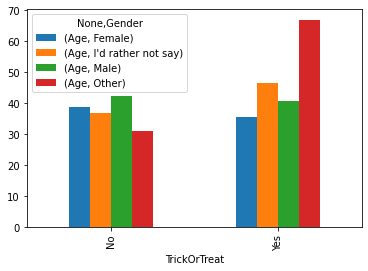

In [245]:
pd.pivot_table(dfInd, index='TrickOrTreat', columns='Gender').plot(kind='bar')

In [246]:
pd.pivot_table(dfInd, index='TrickOrTreat')

,Age
TrickOrTreat,
No,40.875772
Yes,39.346154


In [247]:
# pd.pivot_table(dfInd, index='Country', columns='TrickOrTreat', aggfunc=len)

In [248]:
# pd.pivot_table(dfInd, index='TrickOrTreat', aggfunc=len)

,[100 Grand Bar],[Anonymous brown globs that come in black and orange wrappers],[Any full-sized candy bar],[Black Jacks],[Blue M&M's],[Bonkers (the board game)],[Bonkers (the candy)],[Bottle Caps],[Box'o'Raisins],[Broken glow stick],...,[Vicodin],[Whatchamacallit Bars],[White Bread],[Whole Wheat anything],[York Peppermint Patties],Age,Country,Gender,Locale,Timestamp
TrickOrTreat,,,,,,,,,,,,,,,,,,,,,
No,1121,1121,1121,1121,1121,1121,1121,1121,1121,1121,...,1121,1121,1121,1121,1121,1121.0,1121,1121,1121,1121
Yes,138,138,138,138,138,138,138,138,138,138,...,138,138,138,138,138,138.0,138,138,138,138


In [249]:
test = dfInd.copy()

In [250]:
test.head()

,Timestamp,TrickOrTreat,Gender,Age,Country,Locale,[100 Grand Bar],[Anonymous brown globs that come in black and orange wrappers],[Any full-sized candy bar],[Black Jacks],...,[Three Musketeers],[Tolberone something or other],[Trail Mix],[Twix],"[Vials of pure high fructose corn syrup, for main-lining into your vein]",[Vicodin],[Whatchamacallit Bars],[White Bread],[Whole Wheat anything],[York Peppermint Patties]
0,2016-10-24 05:09:23.033,No,Male,22.0,Canada,Ontario,JOY,DESPAIR,JOY,MEH,...,JOY,JOY,DESPAIR,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,DESPAIR,JOY
1,2016-10-24 05:09:54.798,No,Male,45.0,United States,il,MEH,MEH,JOY,JOY,...,JOY,JOY,MEH,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,JOY
2,2016-10-24 05:13:06.734,No,Female,48.0,United States,Colorado,JOY,DESPAIR,JOY,MEH,...,JOY,JOY,DESPAIR,JOY,DESPAIR,DESPAIR,MEH,DESPAIR,DESPAIR,JOY
3,2016-10-24 05:14:17.192,No,Male,57.0,United States,il,JOY,MEH,JOY,MEH,...,JOY,JOY,JOY,JOY,DESPAIR,JOY,JOY,DESPAIR,DESPAIR,JOY
4,2016-10-24 05:14:24.625,Yes,Male,42.0,United States,South Dakota,MEH,DESPAIR,JOY,DESPAIR,...,JOY,JOY,MEH,JOY,JOY,JOY,MEH,DESPAIR,DESPAIR,MEH


#### Repalce JOY, DESPAIR, MEH, and UNKNOWN with values:

In [251]:
test.replace('JOY', 1, inplace=True)
test.replace('DESPAIR', -1, inplace=True)
test.replace(['MEH', 'UNKNOWN'], 0, inplace=True)

In [252]:
test.head(3)

,Timestamp,TrickOrTreat,Gender,Age,Country,Locale,[100 Grand Bar],[Anonymous brown globs that come in black and orange wrappers],[Any full-sized candy bar],[Black Jacks],...,[Three Musketeers],[Tolberone something or other],[Trail Mix],[Twix],"[Vials of pure high fructose corn syrup, for main-lining into your vein]",[Vicodin],[Whatchamacallit Bars],[White Bread],[Whole Wheat anything],[York Peppermint Patties]
0,2016-10-24 05:09:23.033,No,Male,22.0,Canada,Ontario,1,-1,1,0,...,1,1,-1,1,-1,1,-1,-1,-1,1
1,2016-10-24 05:09:54.798,No,Male,45.0,United States,il,0,0,1,1,...,1,1,0,1,-1,1,1,-1,-1,1
2,2016-10-24 05:13:06.734,No,Female,48.0,United States,Colorado,1,-1,1,0,...,1,1,-1,1,-1,-1,0,-1,-1,1


In [253]:
# pd.pivot_table(test, index='TrickOrTreat')

,[100 Grand Bar],[Anonymous brown globs that come in black and orange wrappers],[Any full-sized candy bar],[Black Jacks],[Blue M&M's],[Bonkers (the board game)],[Bonkers (the candy)],[Bottle Caps],[Box'o'Raisins],[Broken glow stick],...,[Tolberone something or other],[Trail Mix],[Twix],"[Vials of pure high fructose corn syrup, for main-lining into your vein]",[Vicodin],[Whatchamacallit Bars],[White Bread],[Whole Wheat anything],[York Peppermint Patties],Age
TrickOrTreat,,,,,,,,,,,,,,,,,,,,,
No,0.371097,-0.606601,0.822480,-0.344335,0.436218,-0.178412,-0.213202,-0.081178,-0.520071,-0.860839,...,0.644960,-0.225691,0.662801,-0.512043,0.046387,0.240856,-0.764496,-0.603925,0.453167,40.875772
Yes,0.369565,-0.608696,0.833333,-0.369565,0.434783,-0.057971,-0.159420,0.144928,-0.500000,-0.833333,...,0.572464,-0.260870,0.695652,-0.405797,0.043478,0.253623,-0.688406,-0.637681,0.384058,39.346154


In [254]:
test.columns

Index(['Timestamp', 'TrickOrTreat', 'Gender', 'Age', 'Country', 'Locale',
       ' [100 Grand Bar]',
       ' [Anonymous brown globs that come in black and orange wrappers]',
       ' [Any full-sized candy bar]', ' [Black Jacks]',
       ...
       ' [Three Musketeers]', ' [Tolberone something or other]',
       ' [Trail Mix]', ' [Twix]',
       ' [Vials of pure high fructose corn syrup, for main-lining into your vein]',
       ' [Vicodin]', ' [Whatchamacallit Bars]', ' [White Bread]',
       ' [Whole Wheat anything]', ' [York Peppermint Patties]'],
      dtype='object', length=106)

In [255]:
test.columns[6:]

Index([' [100 Grand Bar]',
       ' [Anonymous brown globs that come in black and orange wrappers]',
       ' [Any full-sized candy bar]', ' [Black Jacks]',
       ' [Bonkers (the candy)]', ' [Bonkers (the board game)]',
       ' [Bottle Caps]', ' [Box'o'Raisins]', ' [Broken glow stick]',
       ' [Butterfinger]', ' [Cadbury Creme Eggs]', ' [Candy Corn]',
       ' [Candy that is clearly just the stuff given out for free at restaurants]',
       ' [Caramellos]', ' [Cash, or other forms of legal tender]',
       ' [Chardonnay]', ' [Chick-o-Sticks (we don’t know what that is)]',
       ' [Chiclets]', ' [Coffee Crisp]',
       ' [Creepy Religious comics/Chick Tracts]', ' [Dental paraphenalia]',
       ' [Dots]', ' [Dove Bars]', ' [Fuzzy Peaches]',
       ' [Generic Brand Acetaminophen]', ' [Glow sticks]',
       ' [Goo Goo Clusters]', ' [Good N' Plenty]',
       ' [Gum from baseball cards]', ' [Gummy Bears straight up]',
       ' [Hard Candy]', ' [Healthy Fruit]', ' [Heath Bar]',
       ' 

In [256]:
pd.pivot_table(test, index='TrickOrTreat', values=list(test.columns[6:]))

,[100 Grand Bar],[Anonymous brown globs that come in black and orange wrappers],[Any full-sized candy bar],[Black Jacks],[Blue M&M's],[Bonkers (the board game)],[Bonkers (the candy)],[Bottle Caps],[Box'o'Raisins],[Broken glow stick],...,[Tic Tacs],[Tolberone something or other],[Trail Mix],[Twix],"[Vials of pure high fructose corn syrup, for main-lining into your vein]",[Vicodin],[Whatchamacallit Bars],[White Bread],[Whole Wheat anything],[York Peppermint Patties]
TrickOrTreat,,,,,,,,,,,,,,,,,,,,,
No,0.371097,-0.606601,0.822480,-0.344335,0.436218,-0.178412,-0.213202,-0.081178,-0.520071,-0.860839,...,-0.276539,0.644960,-0.225691,0.662801,-0.512043,0.046387,0.240856,-0.764496,-0.603925,0.453167
Yes,0.369565,-0.608696,0.833333,-0.369565,0.434783,-0.057971,-0.159420,0.144928,-0.500000,-0.833333,...,-0.094203,0.572464,-0.260870,0.695652,-0.405797,0.043478,0.253623,-0.688406,-0.637681,0.384058


In [262]:
# pd.pivot_table(test, index='TrickOrTreat', values=list(test.columns[6:])).plot(kind='bar')

In [258]:
pd.pivot_table(test, columns='TrickOrTreat', values=list(test.columns[6:]))

TrickOrTreat,No,Yes
[100 Grand Bar],0.371097,0.369565
[Anonymous brown globs that come in black and orange wrappers],-0.606601,-0.608696
[Any full-sized candy bar],0.822480,0.833333
[Black Jacks],-0.344335,-0.369565
[Blue M&M's],0.436218,0.434783
...,...,...
[Vicodin],0.046387,0.043478
[Whatchamacallit Bars],0.240856,0.253623
[White Bread],-0.764496,-0.688406
[Whole Wheat anything],-0.603925,-0.637681


In [259]:
# pd.pivot_table(test, columns='TrickOrTreat', values=list(test.columns[6:])).plot(kind='bar')

In [260]:
pd.pivot_table(test, columns='Gender', values=list(test.columns[6:]))

Gender,Female,I'd rather not say,Male,Other
[100 Grand Bar],0.265854,0.321429,0.422642,0.470588
[Anonymous brown globs that come in black and orange wrappers],-0.629268,-0.428571,-0.601258,-0.529412
[Any full-sized candy bar],0.824390,0.642857,0.827673,0.941176
[Black Jacks],-0.363415,-0.214286,-0.343396,-0.235294
[Blue M&M's],0.439024,0.321429,0.440252,0.352941
...,...,...,...,...
[Vicodin],-0.068293,0.035714,0.101887,0.176471
[Whatchamacallit Bars],0.136585,0.107143,0.301887,0.176471
[White Bread],-0.712195,-0.607143,-0.787421,-0.647059
[Whole Wheat anything],-0.546341,-0.500000,-0.645283,-0.470588


In [261]:
pd.pivot_table(test, columns='Country', values=list(test.columns[6:]))

Country,American Samoa,Australia,Austria,Belgium,Brazil,Canada,China,Croatia,Finland,France,...,Panama,Philippines,Portugal,Spain,Sweden,Switzerland,Tonga,Ukraine,United Kingdom,United States
[100 Grand Bar],0.75,0.00,1.0,-1.0,1.0,0.084746,-1.0,0.0,0.0,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.05,0.418473
[Anonymous brown globs that come in black and orange wrappers],-0.25,-0.50,0.0,-1.0,0.0,-0.483051,1.0,0.0,-1.0,-0.666667,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,1.0,-0.55,-0.629595
[Any full-sized candy bar],1.00,1.00,1.0,-1.0,1.0,0.923729,1.0,1.0,1.0,0.333333,...,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.60,0.824694
[Black Jacks],0.00,0.50,0.0,-1.0,1.0,-0.211864,0.0,0.0,0.0,-0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.30,-0.379830
[Blue M&M's],0.75,0.75,0.0,-1.0,0.0,0.491525,-1.0,0.0,1.0,0.333333,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.35,0.437323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
[Vicodin],0.25,-0.25,-1.0,-1.0,-1.0,-0.050847,0.0,1.0,-1.0,-0.333333,...,-1.0,-1.0,-1.0,0.0,-1.0,0.0,0.0,0.0,-0.45,0.065033
[Whatchamacallit Bars],0.25,-0.50,1.0,-1.0,1.0,-0.084746,1.0,0.0,-1.0,-0.333333,...,-1.0,0.0,-1.0,0.0,1.0,0.0,0.0,0.0,0.05,0.290292
[White Bread],-0.75,-1.00,-1.0,-1.0,0.0,-0.779661,0.0,-1.0,-1.0,-1.000000,...,-1.0,0.0,-1.0,0.0,-1.0,-1.0,1.0,-1.0,-0.80,-0.755891
[Whole Wheat anything],-0.75,-1.00,-1.0,-1.0,0.0,-0.635593,-1.0,-1.0,-1.0,-0.666667,...,-1.0,0.0,-1.0,0.0,-1.0,-1.0,1.0,-1.0,-0.60,-0.613572
